## Stage 1: Data collection

In [1]:
#importing the required libraries

import pandas as pd

#reading the data using pandas
data = pd.read_csv("StudentsPerformance.csv")

In [2]:
#this will show the data
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## Stage 2: Data Cleaning

In [3]:
#this will give the information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


As we can see there is no null values in the dataframe, and the data type is good as it is, So no need of any data cleaning steps in this stage

## Stage 3: Data visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#counting the no.of males and females
p= data['gender'].tolist()
a=[]
b=[]
for i in range (0,len(p)):
  if p[i] == 'male':
    a.append(i)
  else:
    b.append(i)
print("No.of male :",len(a))
print("No.of female :",len(b))


No.of male : 482
No.of female : 518


# Visualization #1 

it's the visualizaition of no.of males vs female students

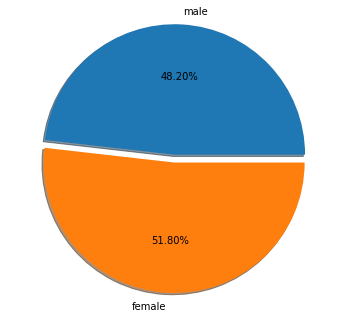

In [6]:

%matplotlib inline 

df_x = [len(a),len(b)]
df_y = ["male","female"]

plt.axis("equal")
plt.pie(df_x, labels=df_y,radius=1.5,autopct='%0.2f%%',shadow=True,explode=[0,0.09])
plt.show()


# Visualization #2

It will show the percentage of student's group

No.of Group A : 89
No.of Group B : 190
No.of Group C : 319
No.of Group D : 262
No.of Group E : 140


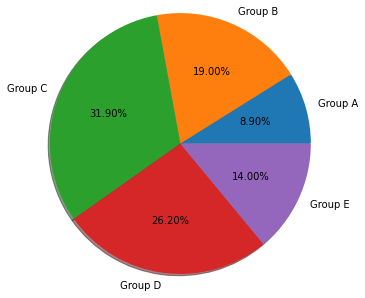

In [7]:
p= data['race/ethnicity'].tolist()
a=[]
b=[]
c=[]
d=[]
e=[]

for i in range (0,len(p)):
  if p[i] == 'group A':
    a.append(i)
  elif p[i] == 'group B':
    b.append(i)
  elif p[i] == 'group C':
    c.append(i)
  elif p[i] == 'group D':
    d.append(i)
  else:
    e.append(i)
print("No.of Group A :",len(a))
print("No.of Group B :",len(b))
print("No.of Group C :",len(c))
print("No.of Group D :",len(d))
print("No.of Group E :",len(e))

%matplotlib inline 

df_x = [len(a),len(b),len(c),len(d),len(e)]
df_y = ["Group A","Group B", "Group C", " Group D", "Group E"]

plt.axis("equal")
plt.pie(df_x, labels=df_y,radius=1.5,autopct='%0.2f%%',shadow=True)
plt.show()




# Visualization #3

It's the visualization of the mean performance of male and female candidataes in the exam

In [8]:
subjects = ['math score', 'reading score', 'writing score']

dataset = data.groupby('gender')[subjects].mean()
print(dataset)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<function matplotlib.pyplot.show(close=None, block=None)>

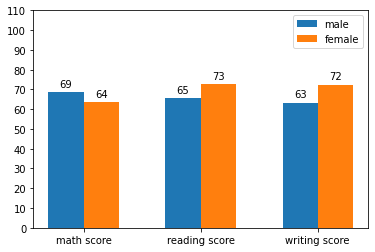

In [9]:
index = np.arange(len(subjects))
score_label = np.arange(0,120,10)

Mean_of_male_scores = list(dataset.T['male'])
Mean_of_female_scores = list(dataset.T['female'])

bar_w = 0.3

fig, ax = plt.subplots()
bar_male = ax.bar(index - bar_w/2, Mean_of_male_scores, bar_w, label= "male")
bar_female = ax.bar(index + bar_w/2, Mean_of_female_scores, bar_w, label= "female")

ax.set_xticks(index)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

for i in index:
  ax.annotate('{0:.0f}'.format(bar_male[i].get_height()),xy = (bar_male[i].get_x() + bar_male[i].get_width()/2,bar_male[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_female[i].get_height()),xy = (bar_female[i].get_x() + bar_female[i].get_width()/2,bar_female[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')


ax.legend()
plt.show

# Visualization #4

It's the visualization of mean scores for the students who completed the course vs who didn't

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


<function matplotlib.pyplot.show(close=None, block=None)>

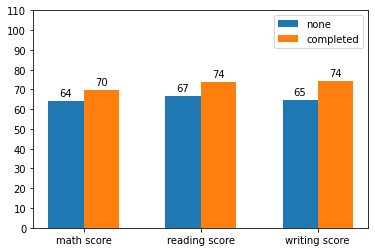

In [10]:
subjects = ['math score', 'reading score', 'writing score']

dataset = data.groupby('test preparation course')[subjects].mean()
print(dataset)

index = np.arange(len(subjects))
score_label = np.arange(0,120,10)

Mean_of_male_scores = list(dataset.T['none'])
Mean_of_female_scores = list(dataset.T['completed'])

bar_w = 0.3

fig, ax = plt.subplots()
bar_male = ax.bar(index - bar_w/2, Mean_of_male_scores, bar_w, label= "none")
bar_female = ax.bar(index + bar_w/2, Mean_of_female_scores, bar_w, label= "completed")

ax.set_xticks(index)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

for i in index:
  ax.annotate('{0:.0f}'.format(bar_male[i].get_height()),xy = (bar_male[i].get_x() + bar_male[i].get_width()/2,bar_male[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_female[i].get_height()),xy = (bar_female[i].get_x() + bar_female[i].get_width()/2,bar_female[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')


ax.legend()
plt.show

# Visualization #5

It's the visualization of the student's scores with their parents educational level

                             math score  reading score  writing score
parental level of education                                          
associate's degree                67.88          70.93          69.90
bachelor's degree                 69.39          73.00          73.38
high school                       62.14          64.70          62.45
master's degree                   69.75          75.37          75.68
some college                      67.13          69.46          68.84
some high school                  63.50          66.94          64.89


<function matplotlib.pyplot.show(close=None, block=None)>

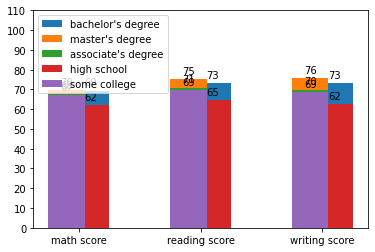

In [18]:
subjects = ['math score', 'reading score', 'writing score']

dataset = data.groupby('parental level of education')[subjects].mean()
print(dataset)

index = np.arange(len(subjects))
score_label = np.arange(0,120,10)

Mean_of_x1 = list(dataset.T["bachelor's degree"])
Mean_of_x2 = list(dataset.T['some college'])
Mean_of_x3 = list(dataset.T["master's degree"])
Mean_of_x4 = list(dataset.T["associate's degree"])
Mean_of_x5 = list(dataset.T['high school'])

bar_w = 0.3


fig, ax = plt.subplots()
bar_x1 = ax.bar(index + bar_w/3, Mean_of_x1, bar_w, label= "bachelor's degree")

bar_x3 = ax.bar(index -bar_w/3, Mean_of_x3, bar_w, label= "master's degree")
bar_x4 = ax.bar(index - bar_w/3, Mean_of_x4, bar_w, label= "associate's degree")
bar_x5 = ax.bar(index +bar_w/3, Mean_of_x5, bar_w, label= "high school")
bar_x2 = ax.bar(index - bar_w/3, Mean_of_x2 , bar_w, label= "some college")

ax.set_xticks(index)
ax.set_xticklabels(subjects)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

for i in index:
  ax.annotate('{0:.0f}'.format(bar_x1[i].get_height()),xy = (bar_x1[i].get_x() + bar_x1[i].get_width()/2,bar_x1[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_x2[i].get_height()),xy = (bar_x2[i].get_x() + bar_x2[i].get_width()/2,bar_x2[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_x3[i].get_height()),xy = (bar_x3[i].get_x() + bar_x3[i].get_width()/2,bar_x3[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_x4[i].get_height()),xy = (bar_x4[i].get_x() + bar_x4[i].get_width()/2,bar_x4[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

for i in index:
  ax.annotate('{0:.0f}'.format(bar_x5[i].get_height()),xy = (bar_x5[i].get_x() + bar_x5[i].get_width()/2,bar_x5[i].get_height()),xytext = (0,3),textcoords = 'offset points',ha = 'center',va = 'bottom')

ax.legend()
plt.show

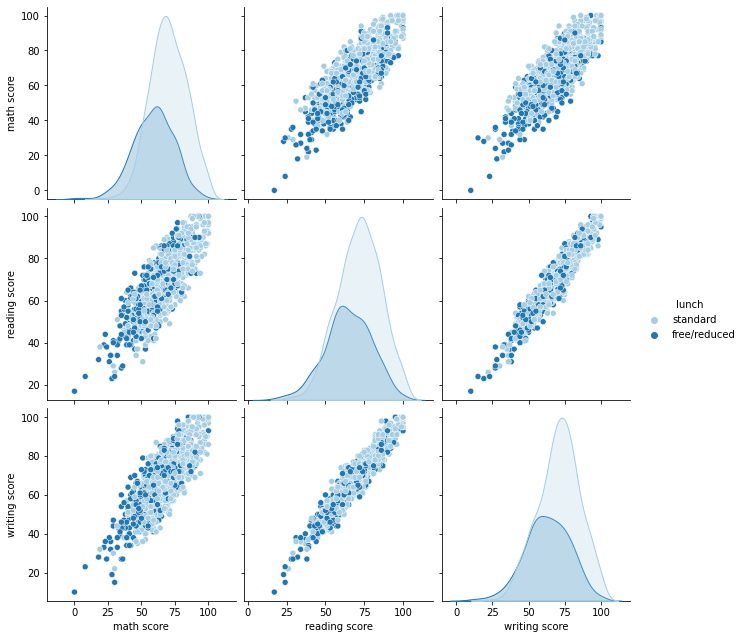

In [15]:
#visual representation of all possible  relations

info= sns.pairplot(data, height=3,
                            vars=['math score','reading score','writing score'], hue='lunch', palette="Paired")
plt.show(info)

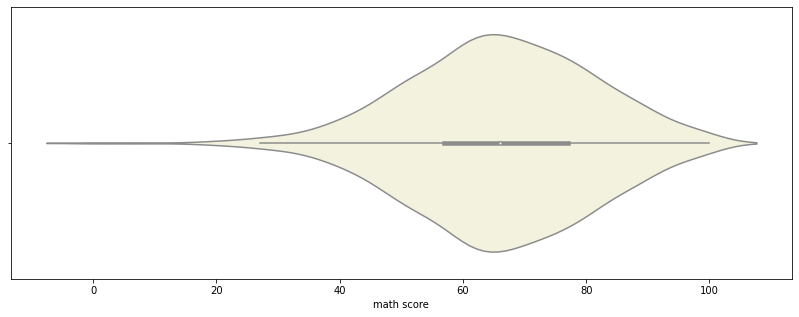

In [17]:
plt.figure(figsize=(14,5))
sns.violinplot(data=data , x="math score",color='beige')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


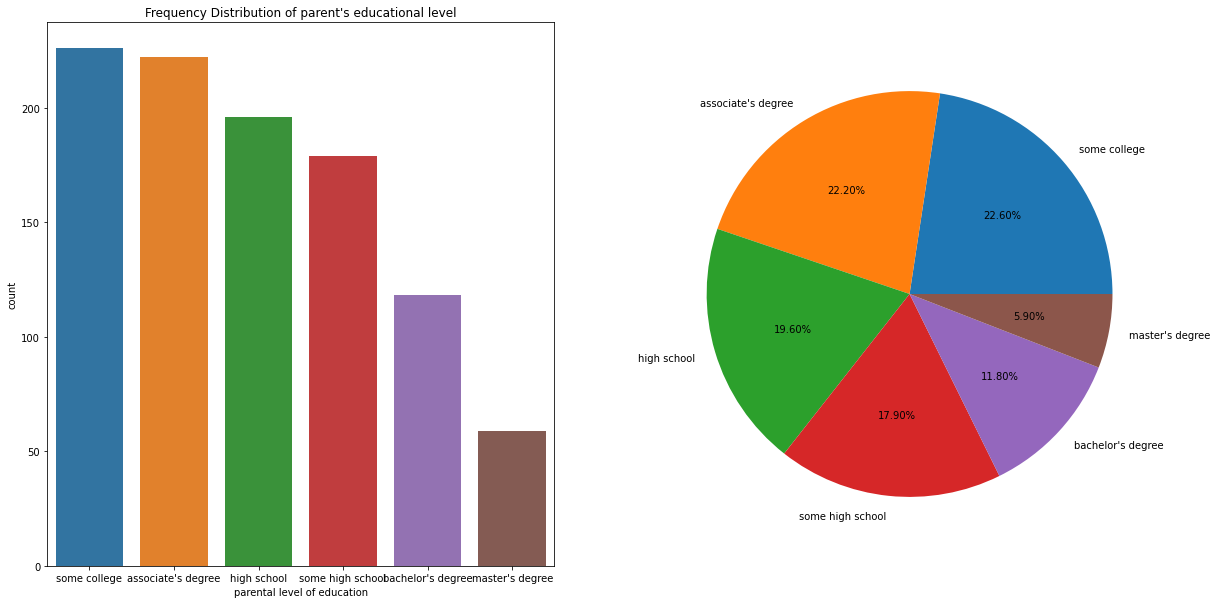

In [12]:
# importing the required libraries 
import os
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
f,ax=plt.subplots(1,2,figsize=(20,10))
data['parental level of education'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1],shadow=False)                                                  
ax[1].set_title('')
ax[1].set_ylabel('')
sns.countplot('parental level of education',order = data['parental level of education'].value_counts().index, data=data,ax=ax[0])
ax[0].set_title("Frequency Distribution of parent's educational level")
ax[0].set_ylabel('count')
plt.show()